In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Пример

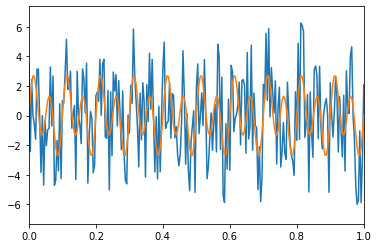

In [163]:
nu1 = 10;
nu2 = 20;
N = 10000;
xMax = 40;
x = np.linspace(0, xMax, N);
y0 = 1 * np.sin(2 * np.pi * nu1 * x) + 2 * np.sin(2 * np.pi * nu2 * x)
y = y0 + 4 *  np.random.uniform(-1, 1, N);

plt.plot(x, y)
plt.plot(x, y0)
plt.xlim(0,1)
plt.show()

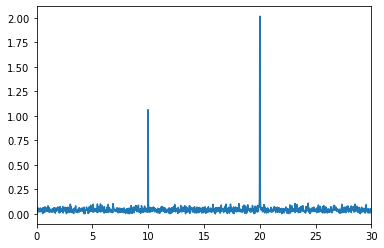

In [164]:
orig = np.fft.rfft(y)
spectrum = 1/N * np.abs(orig)
spectrum[1:] = spectrum[1:]*2

freq = np.fft.rfftfreq(N, xMax/N)

plt.plot(freq[1:], spectrum[1:])
plt.xlim(0, 30)
plt.show()

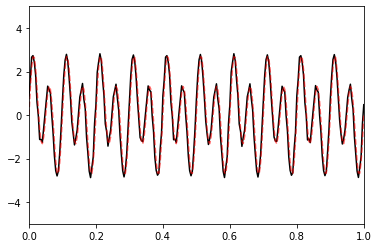

In [165]:
tmp = orig.copy()
tmp[tmp < 500] = 0
plt.plot(x, np.fft.irfft(tmp), "black")
plt.plot(x, y0, "r--", alpha=0.6)
plt.xlim(0, 1)
plt.ylim(-5, 5)
plt.show()

## Картинка

In [294]:
from PIL import Image
im = Image.open("im1.jpg")
frame = np.asarray(im)
N = frame.shape[0] * frame.shape[1]

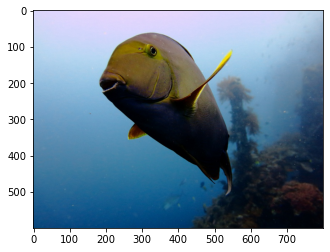

In [304]:
plt.imshow(frame)
plt.show()

(600, 401, 3)


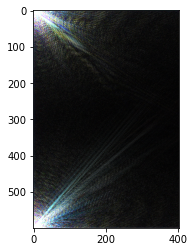

In [371]:
# смотреть на фурье-образ рыбы -- не очень содержательно, поэтому немного его отмасштабируем)
orig = np.fft.rfft2(frame, axes=(0,1))
res = (np.abs(orig)/100).astype("int")

print(res.shape)
plt.imshow(np.clip(res, 0, 255))
plt.savefig("out.jpg")
plt.show()

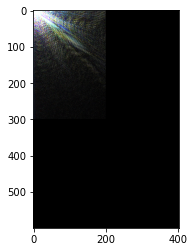

In [368]:
# обрезаем частоты
orig2 = orig.copy()
orig2[300:] = orig2[300:] * 0
# orig2[:300] = orig2[:300] * 0
orig2[:, 200:] = orig2[:, 200:] * 0

plt.imshow(np.clip(np.abs(orig2)/100, 0, 255).astype("int"))
plt.show()

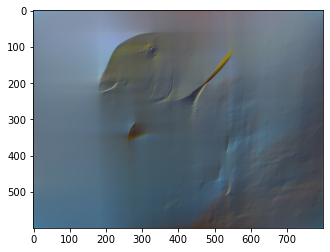

In [370]:
back = np.fft.irfft2(orig2, axes=(0,1));
m1 = np.min(back);
m2 = np.max(back);
back = (back - m1) / (m2 - m1) * 255
back = back.astype("int")

plt.imshow(back)
plt.savefig("out2.jpg")
plt.show()